# Gauss-type quadrature

An important operation in numerical analysis is to calculate the integrals of functions. In general, 
$$
\int_{-1}^{1} u(x)\:dx \approx \sum_{i=1}^N w_i u(x_i)
$$
In this expression, $w_i$ is a weight for node $x_i$. For different numerical integration procedures, different weights and nodes are used. 


If polynomials of order $m$ are to be integrated exactly, initially, since $m+1$ coefficients are necessary to define the polynomial, there should be $m+1$ arbitrary nodes and weights. If, on the other hand, the nodes can be fixed beforehand, it is possible to do better.

## Jacobi formulae

Often a weighed integral is useful:

$$
\int_{-1}^{1} (1-x)^\alpha(1+x)^\beta u(x)\:dx = \sum_{i=1}^Q w_i^{\alpha,\beta} u(x^{\alpha,\beta}_i) + R(u)
$$
where R(u) is a remainder which can be zero if $u(x) \in \mathcal{P}_{2Q-k}([-1,1])$

Depending on the number of nodes that are free to float (assume any value necessary to the procedure) different integration schemes are possible:

 * Gauss-Jacobi - $k=1$. Prefix `gj`.
 * Gauss-Radau - $k=2$, one of the ends is included as a node. Prefix `grjm` when -1 is included or `grjp` when 1 is included.
 * Gauss-Lobatto - $k=3$, both ends are included as nodes. Prefix `glj`.
 




## Computing the nodes

Nodes emplyed in the quadrature can be calculated using the following functions:
 
 * `zgj(Q, a, b)` for Gauss-Jacobi with $Q$ nós, weights $\alpha=$`a` and $\beta=$`b`.
 * `zgj(Q, a, b)` for Gauss-Lobatto-Jacobi.
 * `zgrjm(Q, a, b)` for Gauss-Radau-Jacobi including the end -1.
 * `zgrjp(Q, a, b)` for Gauss-Radau-Jacobi including the end 1.
  

In [1]:
using Jacobi
Q = 5
alpha=0.3
beta = 0.8
zgj(Q, alpha, beta) # Gauss-Jacobi

5-element Array{Float64,1}:
 -0.8318710580462595  
 -0.44330355195369164 
  0.061225352188527205
  0.5486519746372411  
  0.8905225083994078  

In [2]:
zgrjm(Q, alpha, beta) # Gauss-Radau-Jacobi, -1

5-element Array{Float64,1}:
 -1.0               
 -0.6352885694007132
 -0.0985338334652126
  0.4603644760780194
  0.8675173327285007

In [3]:
zgrjp(Q, alpha, beta) # Gauss-Radau-Jacobi, 1

5-element Array{Float64,1}:
 -0.798703296287335  
 -0.343011516320357  
  0.22245971332373712
  0.7212352973037569 
  1.0                

In [4]:
zglj(Q, alpha, beta) # Gauss-Lobatto-Jacobi

5-element Array{Float64,1}:
 -1.0                
 -0.5578111342069623 
  0.06526635281470775
  0.6573799462274194 
  1.0                

The default case is to calculate the zeros using  `Float64`, if some other type is necessary, just add the type as  a fourth argument. The only restriction is that this type should be a `FloatingPoint` since iteration is used.

In [5]:
zglj(5, 0, 0, Float32)

5-element Array{Float32,1}:
 -1.0       
 -0.65465367
  0.0       
  0.65465367
  1.0       

In [6]:
zgj(5, 0, 0, BigFloat)

5-element Array{BigFloat,1}:
 -0.9061798459386639927976268782993929651256519107625308628737622865437707949166849
 -0.5384693101056830910363144207002088049672866069055599562022316270594711853677574
  0.0                                                                              
  0.5384693101056830910363144207002088049672866069055599562022316270594711853677574
  0.9061798459386639927976268782993929651256519107625308628737622865437707949166849

## Computing the weights

The functions to compute the weights follow the same naming scheme, just replace the letter `z` by `w`:

 * `wgj(z,a,b)`
 * `wgrjm(z,a,b)`
 * `wgrjp(z,a,b)`
 * `wglj(z,a,b)`
 
 The first argument `z` is an array with the zeros calculated previsouly:

In [7]:
a = 0
b = 0
z = zgj(5, a, b)
w = wgj(z, a, b)

5-element Array{Float64,1}:
 0.23692688505618922
 0.4786286704993664 
 0.5688888888888889 
 0.4786286704993664 
 0.23692688505618922

To compute an integral, 

In [8]:
using Polynomials
u = Poly([10,9,8,7,6,5,4,3,2,1])

Poly(10 + 9*x + 8*x^2 + 7*x^3 + 6*x^4 + 5*x^5 + 4*x^6 + 3*x^7 + 2*x^8 + x^9)

In [9]:
Iu = polyint(u)

Poly(10.0*x + 4.5*x^2 + 2.6666666666666665*x^3 + 1.75*x^4 + 1.2*x^5 + 0.8333333333333334*x^6 + 0.5714285714285714*x^7 + 0.375*x^8 + 0.2222222222222222*x^9 + 0.1*x^10)

In [10]:
I = polyval(Iu, 1.0) - polyval(Iu, -1.0)

29.320634920634923

In [11]:
ui = polyval(u, z)

5-element Array{Float64,1}:
  5.402371723578878
  6.727001927926925
 10.0              
 19.144312587491953
 42.0763817260026  

In [12]:
Igauss = sum(w.*ui)

29.320634920634923

In [13]:
err = Igauss - I

0.0

Since the quadrature had `Q=5` nodes and a Gauss-Jacobi scheme was used, the exact value of the integral was possible. As another example let's use the weights $\alpha=1$ and $\beta=1$. For integer weights, the integrand is stilla polynomial:

In [14]:
p = Poly([1,-1]) * Poly([1,1]) * u

Poly(10 + 9*x - 2*x^2 - 2*x^3 - 2*x^4 - 2*x^5 - 2*x^6 - 2*x^7 - 2*x^8 - 2*x^9 - 2*x^10 - x^11)

Using the same weights, 

In [15]:
Ip = polyint(p)
I2 = polyval(Ip, 1.0) - polyval(Ip, -1.0)
Igauss2 = sum(w.*polyval(p, z))
I2, I2-Igauss

(16.487157287157288, -12.833477633477635)

With new weights:

In [16]:
Q = 5
z2 = zgj(Q, 1, 1)
w2 = wgj(z2, 1, 1)
ui = polyval(u, z2)
Igab = sum(w2.*ui)
I2 - Igab

-3.197442310920451e-14

Which is zero, except for some floting point error!

## Interpolation

The nodes of the quadrature can be used for polynomial interpolation using Lagrangean interpolants. If a function us evaluated at the nodes of the quadrature, 

$$
u_i = u(x_i^{\alpha,\beta})
$$

The corresponding Lagrangean interpolant is $h_i(x)$:

$$
h_i(x) = \prod_{k=1,k\ne i}^Q \frac{x - x_k^{\alpha,\beta}}{x_i^{\alpha,\beta} - x_k^{\alpha,\beta}}
$$

This can be computed using function `lagrange(i, x, z)` where `z` is an array of interpolation nodes


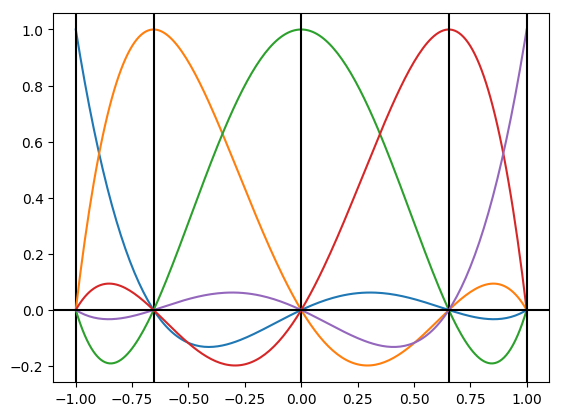

In [17]:
using PyPlot

x = -1.0:0.01:1.0
np = length(x)
Q = 5
z = zglj(Q)
h = zeros(np, Q)
for i = 1:Q
    for k = 1:np
        h[k,i] = lagrange(i, x[k], z)
    end
    plot(x, h[:,i])
    axvline(x=z[i], color="black")
end
axhline(y=0, color="black");



This was calculated using Gauss-Lobatto-Jacobi nodes. If equally spaced nodes were used things are not as pretty:

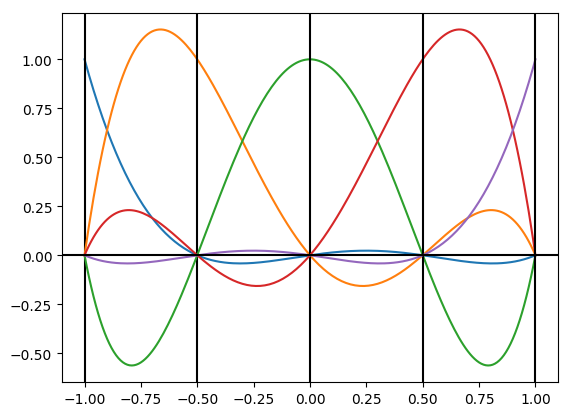

In [19]:
z = range(-1.0, stop=1.0, length=Q)
h = zeros(np, Q)
for i = 1:Q
    for k = 1:np
        h[k,i] = lagrange(i, x[k], z)
    end
    plot(x, h[:,i])
    axvline(x=z[i], color="black")
end
axhline(y=0, color="black");

It still works well but as the number of nodes increases, it will get worse.

## Interpolation matrix

If a function is known at a ser of nodes and has to be interpolated to another set of nodes several times, it is useful to build an interpolation matrix `Imat`
    

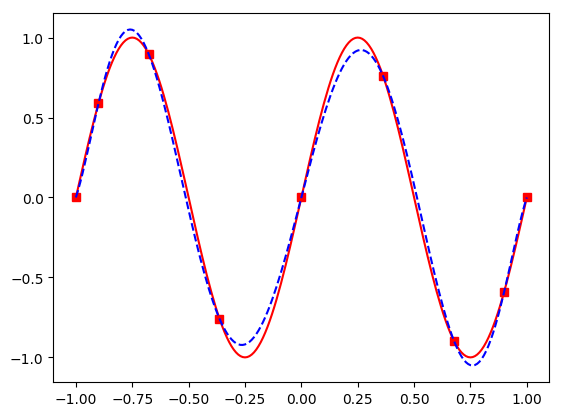

In [20]:
Q = 9
x = -1.0:0.01:1.0
z = zglj(Q)
u = sin.(2π*z)
ue = sin.(2π*x)
imat = interp_mat(x, z)
ui = imat * u
plot(x, ue, "r", z, u, "rs", x, ui, "b--");

## Derivatives

The Lagrange polynomials can be easilly derived but there are explicit expressions for the derivatives at the quadrature nodes. The following functions can be used to calculate a derivative matrix:

 * `dgj(z, a, b)`
 * `dgrjm(z, a, b)`
 * `dgrjp(z, a, b)`
 * `dglj(z, a, b)`
 

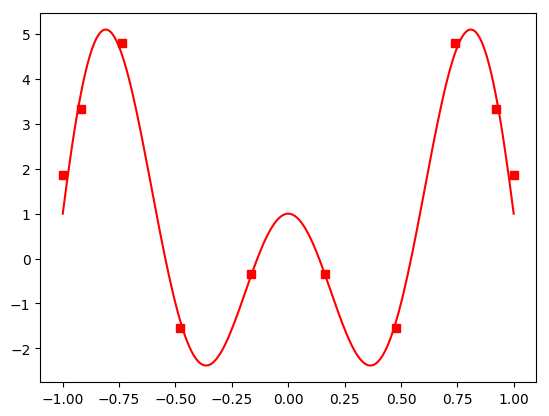

In [21]:
x = -1.0:0.01:1.0
Q = 10
z = zglj(Q)
u = z .* cos.(2π*z)
Dmat = dglj(z)
du = Dmat * u
du_exact = cos.(2π*x) - 2pi*x .* sin.(2π*x)

plot(x, du_exact, "r", z, du, "rs");

## High level interface

Using the low level functions `zg*`, `wg*` and `dg*` can be cumbersome and error prone since they all depend on `z`. So a Higher level is useful. A new type is available that stores all information: `Quadrature`.

To create a new `Quadrature` type:

In [22]:
q = Quadrature(GLJ, 4, 1, 1)

Quadrature{Float64,GLJ}(4, 1.0, 1.0, [-1.0, -0.377964, 0.377964, 1.0], [0.0444444, 0.622222, 0.622222, 0.0444444], [-2.83333 4.25338 -1.92004 0.5; -0.607625 -0.440959 1.32288 -0.274292; 0.274292 -1.32288 0.440959 0.607625; -0.5 1.92004 -4.25338 2.83333])

In [23]:
qzeros(q)

4-element Array{Float64,1}:
 -1.0                
 -0.37796447300922725
  0.37796447300922725
  1.0                

In [24]:
qweights(q)

4-element Array{Float64,1}:
 0.044444444444444446
 0.6222222222222221  
 0.6222222222222221  
 0.044444444444444446

In [25]:
qdiff(q)

4×4 Array{Float64,2}:
 -2.83333    4.25338   -1.92004    0.5     
 -0.607625  -0.440959   1.32288   -0.274292
  0.274292  -1.32288    0.440959   0.607625
 -0.5        1.92004   -4.25338    2.83333 

In [26]:
qalpha(q), qbeta(q)

(1.0, 1.0)

# Solving a differential equation


The differential equation is

$$
\frac{d^2u}{dx^2} + u = \sin 2\pi x
$$

To make things simpler, we will use the following Neumann BCs:

$$
\left.\frac{du}{dx}\right|_{x=-1} = \left.\frac{du}{dx}\right|_{x=1} = 0
$$

The weak form, for appropriate function spaces is:

$$
\int_{-1}^1 \frac{dv}{dx}\frac{du}{dx}\:dx - \left.v\frac{du}{dx}\right|_{-1}^1 - \int_{-1}^1 uv\:dx = -\int_{-1}^1 vf\:dx
$$

Using Lagrange interpolation at the nodes of the Gauss-Lobatto-Jacobi quadrature, we can solve this equation:

$$
u(x) = \sum_{k=1}^Q u_kh_k(x) \qquad v(x) = \sum_{i=1}^Q u_ih_i(x)
$$

Substituting in the weak form, 

$$
\left([L] - [M]\right)\{u\} = -[M]\{f\}
$$

where 

$$
M_{ik} = \int_{-1}^1 h_kh_i\:dx
$$
Usando a propria quadratura utilizada para definir os interpoladores $h_i(x)$ para se integrar esta expressão se obtém uma aproximação da integral mas próxima o suficiente se Q for grande. Com isso, esta matriz é diagonal com cada elemento da diagoal igual ao peso da quadratura:
$$
M_{ik} = w_i\delta_{ik}
$$
Ja a outra matrix é um pouco mais complicado:
$$
L_{ik} = \int_{-1}^1 \frac{dh_i}{dx}\frac{dh_k}{dx}\:dx = \sum_{\alpha=1}^Q w_\alpha D_{\alpha i} D_{\alpha k}
$$




In [27]:
function solve(Q, fun, x)
    z = zglj(Q)
    w = wglj(z)
    D = dglj(z)
    imat = interp_mat(x, z)
    f = fun(z)
    
    L = zeros(Q,Q)
    for i=1:Q, k=1:Q
        ll = 0.0
        for a = 1:Q
            ll = ll + w[a] * D[a,i] * D[a, k]
        end
        L[k,i] = ll
    end
    
    fr = zeros(Q)
    
    for i = 1:Q
        L[i,i] = L[i,i] - w[i]
        fr[i] = - f[i]*w[i]
    end
    
    u = L\fr
    ue = imat * u
    return ue
end
    

solve (generic function with 1 method)

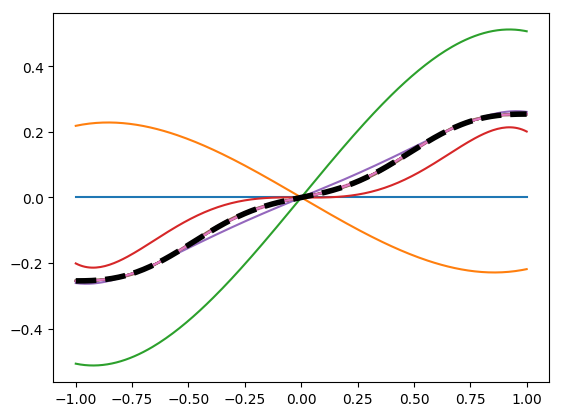

In [29]:
Q = 3:20
nq = length(Q)
x = -1.0:0.01:1.0
np = length(x)
u = zeros(np, nq)
for i = 1:nq
    u[:,i] = solve(Q[i], x->sin.(2π*x), x)
end

for i = 1:(nq-1)
    plot(x, u[:,i])
end
plot(x, u[:,nq], "--", linewidth=4, color="black");

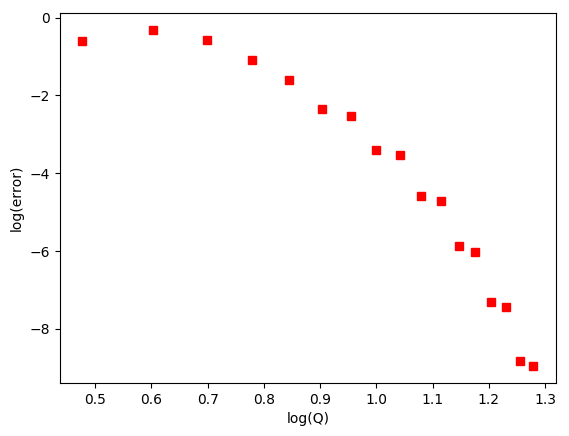

In [34]:
# Cálculo do erro:
ue = u[:,nq]

uerr = zeros(nq-1)

for i = 1:(nq-1)
    uerr[i] = maximum(abs, u[:,i] - ue)
end

plot(log10.(Q[1:(nq-1)]), log10.(uerr), "rs")
xlabel("log(Q)")
ylabel("log(error)");